In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import to_categorical
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
#Load the data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#Check the data format
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


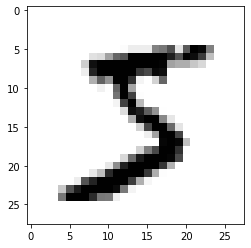

In [4]:
%matplotlib inline
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [312]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [6]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [7]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [335]:
#reshape the training/test dataset
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [336]:
#Normalization
x_train_norm=x_train_reshaped/255
x_test_norm=x_test_reshaped/255

In [13]:
#Model 1 with 3 Dense layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [14]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3764 - accuracy: 0.8903
Epoch 2/3
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1816 - accuracy: 0.9473
Epoch 3/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1376 - accuracy: 0.9596


In [17]:
print('test set accuracy: ', accuracy * 100)

test set accuracy:  95.8899974822998


In [18]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


In [20]:
pred_label=[]
for i in range(len(preds)):
    pred_label.append(np.argmax(preds[i]))

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [304]:
val_pred=model.predict_classes(x_test.reshape(10000,784,))

In [306]:
diff_index_model_0=[]
for i in range(len(y_test)):
    if y_test[i]!=val_pred[i]:
        diff_index_model_0.append(i)

In [307]:
#number of wrong labeled pictures
len(diff_index_model_0)

536

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x644d52e90>)

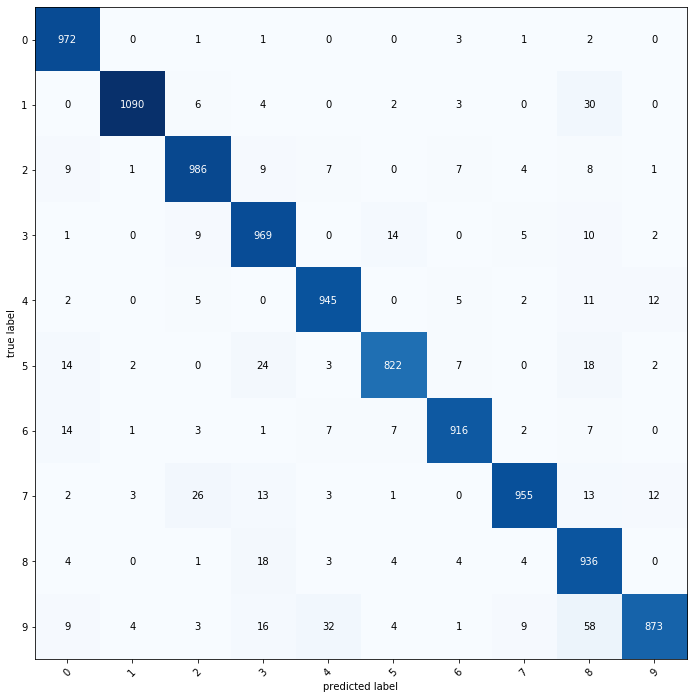

In [58]:
#confusion matrix of test set
mat=confusion_matrix(y_test,val_pred)
plot_confusion_matrix(mat,figsize=(12,12),class_names=[0,1,2,3,4,5,6,7,8,9])

In [27]:
diff_index=[]
for i in range(len(pred_label)):
    if y_test[i]!=pred_label[i]:
        diff_index.append(i)   

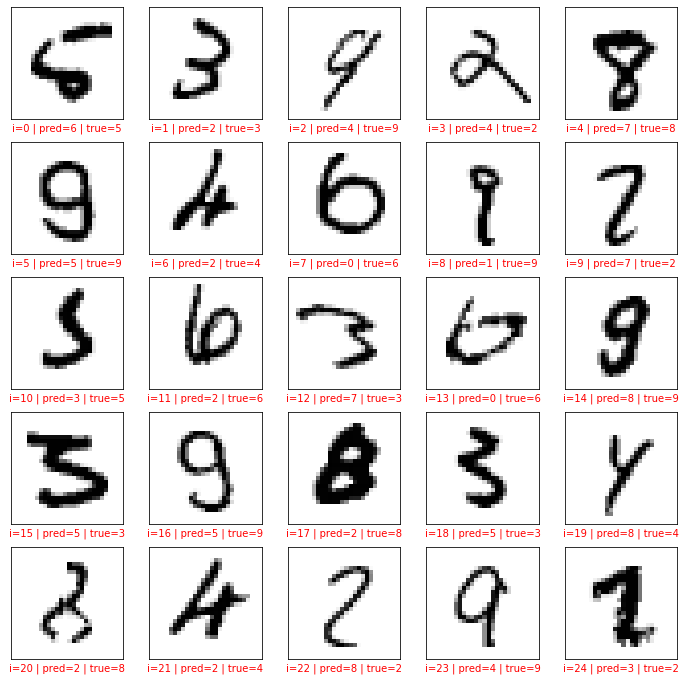

In [317]:
plt.figure(figsize = (12, 12))
start_index=0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred_label[diff_index[i]], y_test[diff_index[i]]), color = col)
    plt.imshow(x_test[diff_index[i]], cmap='binary')
plt.show()

In [31]:
img_3_digit=np.invert(Image.open("Image_3_resized.png").convert('L'))

In [32]:
img_3_digit_norm=img_3_digit/255

In [33]:
img_3_digit_norm_reshaped=img_3_digit_norm.reshape(1,784,)

In [34]:
preds_3 = model.predict(img_3_digit_norm_reshaped)

In [35]:
preds_3_label =np.argmax(preds_3)

In [36]:
preds_3_label

3

In [37]:
preds_3

array([[0.0964295 , 0.09826421, 0.09130302, 0.12495676, 0.09254111,
        0.10466257, 0.0943895 , 0.09995516, 0.09976217, 0.09773592]],
      dtype=float32)

In [38]:
img_3_digit_revised=img_3_digit+244

In [39]:
img_3_digit_revised_norm=img_3_digit_revised/255
img_3_digit_revised_norm_reshaped=img_3_digit_revised_norm.reshape(1,784,)
preds_3_revised = model.predict(img_3_digit_revised_norm_reshaped)
preds_3_revised_label =np.argmax(preds_3_revised)
preds_3_revised_label

3

In [40]:
preds_3_revised

array([[0.1162521 , 0.02632905, 0.08478498, 0.24797593, 0.06777888,
        0.0405129 , 0.08021574, 0.06355789, 0.16978472, 0.10280781]],
      dtype=float32)

In [41]:
from PIL import Image
img_3 = Image.open("Image_3_resized.png")
img_3_digit=np.invert(Image.open("Image_3_resized.png").convert('L'))

img_3_digit_dark=img_3_digit+244
img_3_dark = Image.fromarray(img_3_digit_dark)
img_3_dark.save("image_3_dark.png", "PNG")

In [42]:
img_3_dark = Image.open("image_3_dark.png")

In [333]:
img_3_dark

In [334]:
img_3_digit_dark

array([[254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 251,
        250, 250, 251, 251, 252, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252,   9,
         18,  21,  18,  16,   4, 251, 254, 254, 254, 254, 254, 254, 254,
        254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 252,   3,  26,  20,
          9,   6,   4,   6,  21,  10, 251, 254, 254, 253, 254, 254, 254,
        254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 253,   1,  23,   2, 249,
        251, 252, 252, 252, 251,  19,   5, 252, 254, 254, 254, 254, 254,
        254, 254],
       [25

In [76]:
from matplotlib import pyplot

In [77]:
img_8_digit=np.invert(Image.open("Image_8_resized.png").convert('L'))

In [ ]:
img_8_digit_revised=img_8_digit*1.2

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.imshow(img_8_digit_revised)

In [ ]:
img_3 = Image.open("Image_3.png")

In [ ]:
img_3_digit=np.invert(Image.open("Image_3_resized.png").convert('L'))

In [ ]:
img_3_digit_dark=img_3_digit+150

In [ ]:
pyplot.imshow(img_3_digit_dark,cmap="binary")

In [ ]:
img_3_dark = Image.fromarray(img_3_digit_dark)

In [ ]:
img_3_dark.save("image_3_dark.png", "PNG")

In [ ]:
img_3_digit_dark_1=img_3_digit*2
img_3_dark_1=Image.fromarray(img_3_digit_dark_1)
img_3_dark_1.save("image_3_dark_1.png", "PNG")

In [ ]:
img_3_digit_dark_2=img_3_digit*3
img_3_dark_2=Image.fromarray(img_3_digit_dark_2)
img_3_dark_2.save("image_3_dark_2.png", "PNG")

In [74]:
pyplot.imshow(img_3_digit,cmap="binary")

NameError: name 'pyplot' is not defined

In [ ]:
img_3_dight_reshaped=img_3_digit.reshape(784,)

In [ ]:
for i in range(1,len(img_3_dight_reshaped)):
    if img_3_dight_reshaped[i]<=10:
        img_3_dight_reshaped[i]=0 

In [ ]:
img_3_dight_28_28=img_3_dight_reshaped.reshape(28,28)

In [ ]:
img_3_28_28=Image.fromarray(img_3_dight_28_28)

In [ ]:
img_3_28_28.save("img_3_dight_28_28.png", "PNG")

In [ ]:
pyplot.imshow(img_3_dight_28_28,cmap="binary")

In [ ]:
img_3_dight_reshaped

In [ ]:
pyplot.imshow(img_3_digit,cmap="binary")

In [ ]:
img_3_digit

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
model_2=Sequential()

model_2.add(Conv2D(filters=24,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model_2.add(Conv2D(filters=24,kernel_size=(3,3),padding='same',activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_2.add(Dropout(0.4))

model_2.add(Conv2D(filters=48,kernel_size=(3,3),padding='same',activation='relu'))
model_2.add(Conv2D(filters=48,kernel_size=(3,3),padding='same',activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))

model_2.add(Conv2D(filters=64,kernel_size=5,padding='same',activation='relu'))
model_2.add(Conv2D(filters=64,kernel_size=5,padding='same',activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))

model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10,activation='softmax'))

In [ ]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['sparse_categorical_accuracy']
)

model_2.summary()

In [ ]:
hist_2 = model_2.fit(
    x_train_norm.reshape(-1, 28,28, 1),
    y_train_encoded,
    batch_size=64,
    epochs = 3
)

In [46]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
model_3 = Sequential()

model_3.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(64, (3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Flatten())
model_3.add(Dense(64))

model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model_3.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [47]:
hist_3 = model_3.fit(
    x_train_norm.reshape(-1, 28,28, 1),
    y_train_encoded,
    batch_size=64,
    epochs = 3
)

Epoch 1/3
60000/60000 [==============================] - 57s 954us/step - loss: 0.1236 - accuracy: 0.9629
Epoch 2/3
60000/60000 [==============================] - 58s 961us/step - loss: 0.0446 - accuracy: 0.9860
Epoch 3/3
60000/60000 [==============================] - 59s 987us/step - loss: 0.0317 - accuracy: 0.9904


In [ ]:
#convergent plot

In [56]:
preds_model_3 = model_3.predict_classes(x_test_norm.reshape(-1,28,28,1))

In [63]:
preds_model_3

array([7, 2, 1, ..., 4, 5, 6])

In [318]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [320]:
loss_3, accuracy_3 = model_3.evaluate(x_test_norm.reshape(-1,28,28,1), y_test_encoded)

10000/10000 [==============================] - 5s 545us/step


In [321]:
accuracy_3

0.9901999831199646

In [70]:
diff_index_model_3=[]
for i in range(len(y_test)):
    if y_test[i]!=preds_model_3[i]:
        diff_index_model_3.append(i)

In [72]:
len(diff_index_model_3)

98

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x6649354d0>)

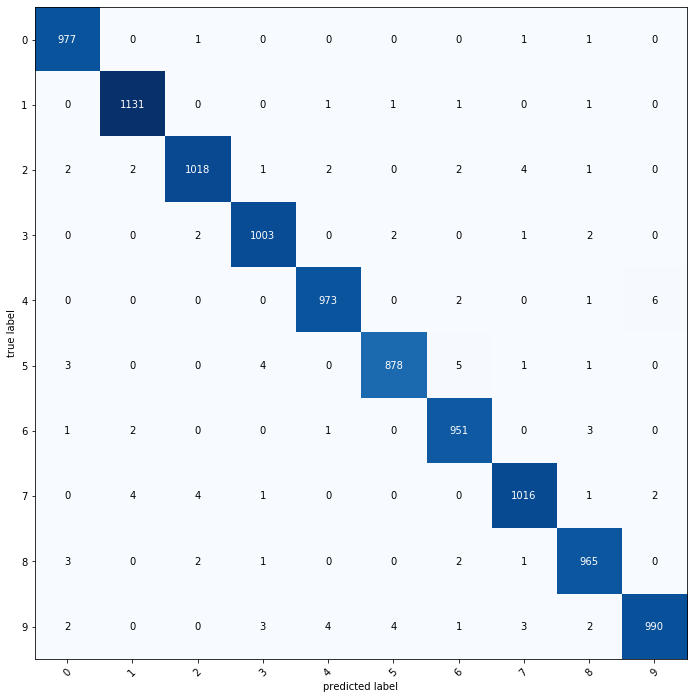

In [62]:
mat_3=confusion_matrix(y_test,preds_model_3)
plot_confusion_matrix(mat_3,figsize=(12,12),class_names=[0,1,2,3,4,5,6,7,8,9])

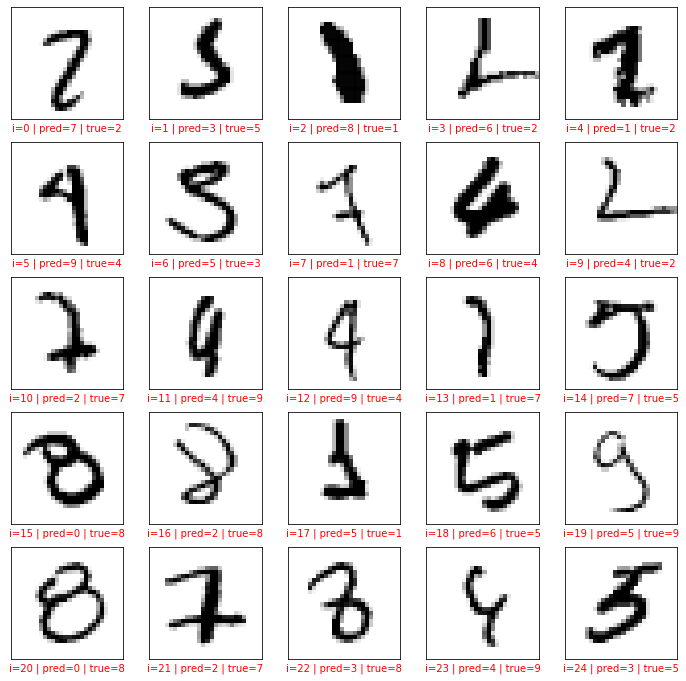

In [322]:
plt.figure(figsize = (12, 12))
start_index=0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, preds_model_3[diff_index_model_3[i]], y_test[diff_index_model_3[i]]), color = col)
    plt.imshow(x_test[diff_index_model_3[i]], cmap='binary')
plt.show()

In [80]:
img_3_digit=np.invert(Image.open("Image_3_resized.png").convert('L'))

In [308]:
img_3=Image.open("Image_3_resized.png")

In [310]:
img_3

In [83]:
img_3_digit_norm=img_3_digit/255

In [ ]:
img_3_digit_norm

In [84]:
preds_model_3_img_3 = model_3.predict_classes(img_3_digit_norm.reshape(-1,28,28,1))

In [323]:
preds_model_img_3_arr = model.predict(img_3_digit_norm.reshape(-1,784,))

In [324]:
preds_model_img_3_arr

array([[0.0964295 , 0.09826421, 0.09130302, 0.12495676, 0.09254111,
        0.10466257, 0.0943895 , 0.09995516, 0.09976217, 0.09773592]],
      dtype=float32)

In [93]:
preds_model_3_img_3_arr = model_3.predict(img_3_digit_norm.reshape(-1,28,28,1))

In [96]:
img_3_dark_digit=np.invert(Image.open("Image_3_dark.png").convert('L'))
img_3_dark_digit_norm=img_3_dark_digit/255
preds_model_3_img_dark_3=model_3.predict_classes(img_3_dark_digit_norm.reshape(-1,28,28,1))

In [98]:
preds_model_3_img_dark_3_array=model_3.predict(img_3_dark_digit_norm.reshape(-1,28,28,1))

In [99]:
preds_model_3_img_dark_3_array

array([[0.00690787, 0.00942214, 0.05382695, 0.8222213 , 0.00446025,
        0.01569902, 0.00195717, 0.03151449, 0.01972073, 0.03427014]],
      dtype=float32)

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range = 25,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

In [130]:
img_3_digit_gen=train_datagen.flow(img_3_digit.reshape(-1,28,28,1))

In [122]:
img_3

In [210]:
x_train_augment_1=np.ndarray(shape=(60000,28,28),dtype=int)
for i in range(len(x_train)):
    img_digit_gen=train_datagen.flow(x_train[i].reshape(-1,28,28,1))
    a=0
    for j in img_digit_gen:
        x_train_augment_1[i]=j.reshape(28,28)
        a+=1
        if a>1:
            break

In [211]:
x_train_augment_2=np.ndarray(shape=(60000,28,28),dtype=int)
for i in range(len(x_train)):
    img_digit_gen=train_datagen.flow(x_train[i].reshape(-1,28,28,1))
    a=0
    for j in img_digit_gen:
        x_train_augment_2[i]=j.reshape(28,28)
        a+=1
        if a>1:
            break

In [212]:
x_train_augment_3=np.ndarray(shape=(60000,28,28),dtype=int)
for i in range(len(x_train)):
    img_digit_gen=train_datagen.flow(x_train[i].reshape(-1,28,28,1))
    a=0
    for j in img_digit_gen:
        x_train_augment_3[i]=j.reshape(28,28)
        a+=1
        if a>1:
            break


In [216]:
x_train_new=np.append(x_train,x_train_augment_1)
y_train_new=np.append(y_train,y_train)

In [217]:
x_train_new_1=np.append(x_train_new,x_train_augment_2)
y_train_new_1=np.append(y_train_new,y_train)

In [218]:
x_train_new_2=np.append(x_train_new_1,x_train_augment_3)
y_train_new_2=np.append(y_train_new_1,y_train)

In [326]:
x_train_new_2_reshaped=x_train_new_2.reshape(240000,28,28)
x_train_new_2_reshaped.shape

(240000, 28, 28)

In [228]:
x_train_new_2_reshaped_norm=x_train_new_2_reshaped/255

In [230]:
model_4 = Sequential()

model_4.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Conv2D(64, (3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Flatten())
model_4.add(Dense(64))

model_4.add(Dense(10))
model_4.add(Activation('softmax'))

model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [232]:
y_train_new_2_encoded=to_categorical(y_train_new_2)

In [235]:
hist_4 = model_4.fit(
    x_train_new_2_reshaped_norm.reshape(-1, 28,28, 1),
    y_train_new_2_encoded,
    batch_size=64,
    epochs = 3
)

Epoch 1/3
240000/240000 [==============================] - 229s 955us/step - loss: 0.5215 - accuracy: 0.8303
Epoch 2/3
240000/240000 [==============================] - 277s 1ms/step - loss: 0.2776 - accuracy: 0.9109
Epoch 3/3
240000/240000 [==============================] - 279s 1ms/step - loss: 0.2292 - accuracy: 0.9271


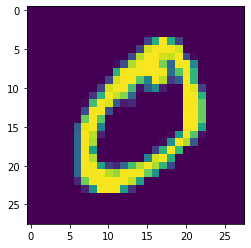

In [250]:
plt.imshow(x_train_new_2_reshaped[1])

In [251]:
y_train_new_2[1]

0

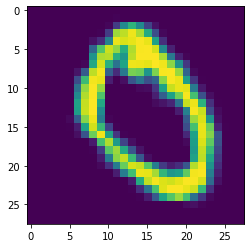

In [252]:
plt.imshow(x_train_augment_1[1])

In [253]:
y_train_new[1]

0

In [262]:
x_train_augment_1=x_train_augment_1[1]/255
preds_model_3_aug_train_1= model_3.predict(x_train_augment_1.reshape(-1,28,28,1))

IndexError: invalid index to scalar variable.

In [195]:
x_train_new_28_28=x_train_new.reshape(120000,28,28)

In [268]:
x_test_aug_0_norm=x_test_augment[0]/255
preds_model_3_aug_test = model_3.predict_classes(x_test_aug_0_norm.reshape(-1,28,28,1))

In [269]:
preds_model_3_aug_test

array([7])

In [267]:
preds_model_3_aug_test

array([[0.01609692, 0.26779124, 0.13945414, 0.02237866, 0.02179217,
        0.01931005, 0.00568619, 0.40441352, 0.0578432 , 0.04523396]],
      dtype=float32)

In [206]:
x_test_augment[0]

numpy.ndarray

In [202]:
preds_model_3_aug_test.shape

(1,)

In [265]:
preds_model_4=model_4.predict_classes(x_test_norm.reshape(-1,28,28,1))

In [241]:
diff_index_model_4=[]
for i in range(len(y_test)):
    if y_test[i]!=preds_model_4[i]:
        diff_index_model_4.append(i)

In [242]:
len(diff_index_model_4)

1035

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a780666d0>)

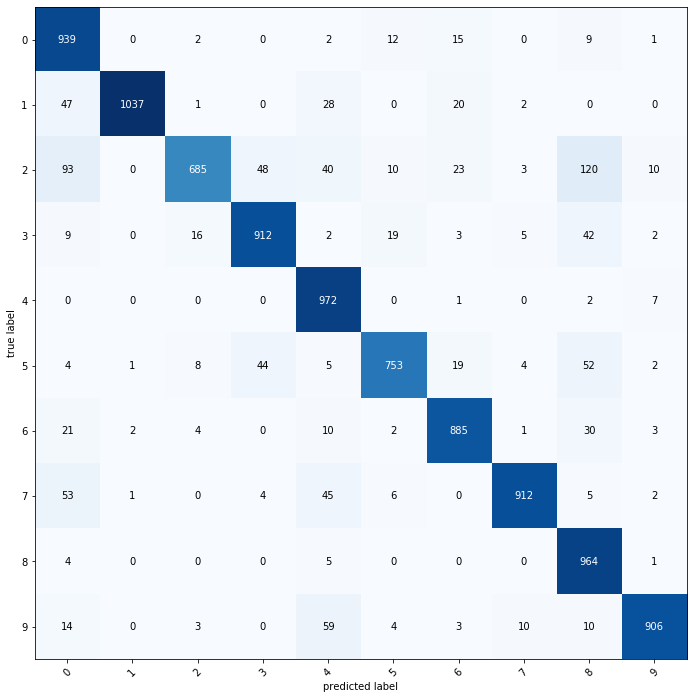

In [244]:
mat_4=confusion_matrix(y_test,preds_model_4)
plot_confusion_matrix(mat_4,figsize=(12,12),class_names=[0,1,2,3,4,5,6,7,8,9])

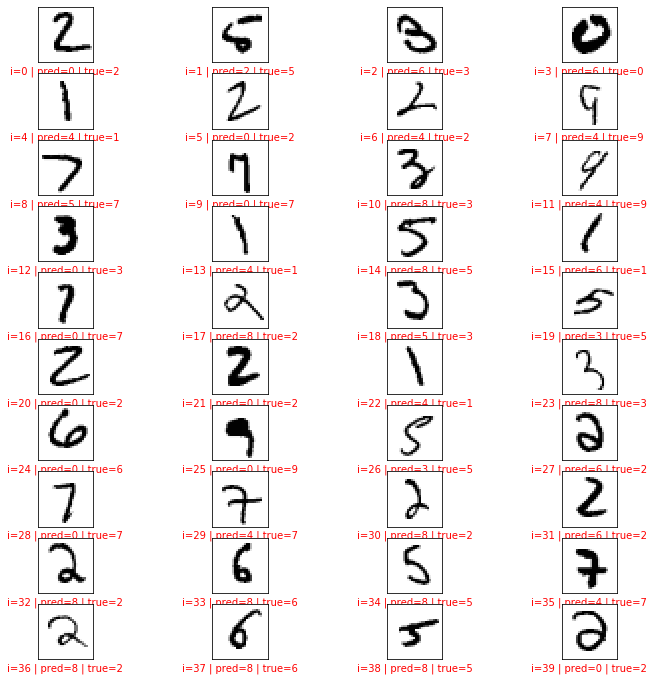

In [243]:
plt.figure(figsize = (12, 12))
start_index=0
for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, preds_model_4[diff_index_model_4[i]], y_test[diff_index_model_4[i]]), color = col)
    plt.imshow(x_test[diff_index_model_4[i]], cmap='binary')
plt.show()

In [ ]:
x_test_augment

In [154]:
x_test_augment=np.ndarray(shape=(60000,28,28),dtype=int)

In [271]:
#data augmentation
#only rotation
train_datagen_1 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0,
    height_shift_range = 0,
    shear_range = 0,
    zoom_range = 0,
    horizontal_flip = False,
)

In [272]:
x_train_augment_4=np.ndarray(shape=(60000,28,28),dtype=int)
for i in range(len(x_train)):
    img_digit_gen=train_datagen_1.flow(x_train[i].reshape(-1,28,28,1))
    a=0
    for j in img_digit_gen:
        x_train_augment_4[i]=j.reshape(28,28)
        a+=1
        if a>1:
            break

In [273]:
x_train_augment_5=np.ndarray(shape=(60000,28,28),dtype=int)
for i in range(len(x_train)):
    img_digit_gen=train_datagen_1.flow(x_train[i].reshape(-1,28,28,1))
    a=0
    for j in img_digit_gen:
        x_train_augment_5[i]=j.reshape(28,28)
        a+=1
        if a>1:
            break

In [274]:
x_train_augment_6=np.ndarray(shape=(60000,28,28),dtype=int)
for i in range(len(x_train)):
    img_digit_gen=train_datagen_1.flow(x_train[i].reshape(-1,28,28,1))
    a=0
    for j in img_digit_gen:
        x_train_augment_6[i]=j.reshape(28,28)
        a+=1
        if a>1:
            break

In [280]:
x_train_new_3=np.append(x_train,x_train_augment_4,axis=0)
y_train_new_3=np.append(y_train,y_train)
x_train_new_4=np.append(x_train_new_3,x_train_augment_5,axis=0)
y_train_new_4=np.append(y_train_new_3,y_train)
x_train_new_5=np.append(x_train_new_4,x_train_augment_6,axis=0)
y_train_new_5=np.append(y_train_new_4,y_train)

In [283]:
x_train_new_5_norm=x_train_new_5/255

In [285]:
model_5 = Sequential()

model_5.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))

model_5.add(Conv2D(64, (3,3)))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))

model_5.add(Flatten())
model_5.add(Dense(64))

model_5.add(Dense(10))
model_5.add(Activation('softmax'))

model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_11 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

In [286]:
y_train_new_5_encoded=to_categorical(y_train_new_5)

In [287]:
hist_5 = model_5.fit(
    x_train_new_5_norm.reshape(-1, 28,28, 1),
    y_train_new_5_encoded,
    batch_size=64,
    epochs = 3
)

Epoch 1/3
240000/240000 [==============================] - 248s 1ms/step - loss: 0.0860 - accuracy: 0.9735
Epoch 2/3
240000/240000 [==============================] - 245s 1ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 3/3
240000/240000 [==============================] - 234s 975us/step - loss: 0.0230 - accuracy: 0.9927


In [327]:
preds_model_5=model_5.predict_classes(x_test_norm.reshape(-1,28,28,1))
diff_index_model_5=[]
for i in range(len(y_test)):
    if y_test[i]!=preds_model_5[i]:
        diff_index_model_5.append(i)

In [329]:
loss, accuracy = model_5.evaluate(x_test_norm.reshape(-1,28,28,1), y_test_encoded)

10000/10000 [==============================] - 5s 527us/step


In [330]:
accuracy

0.9890999794006348

In [291]:
len(diff_index_model_5)

109

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c687cb310>)

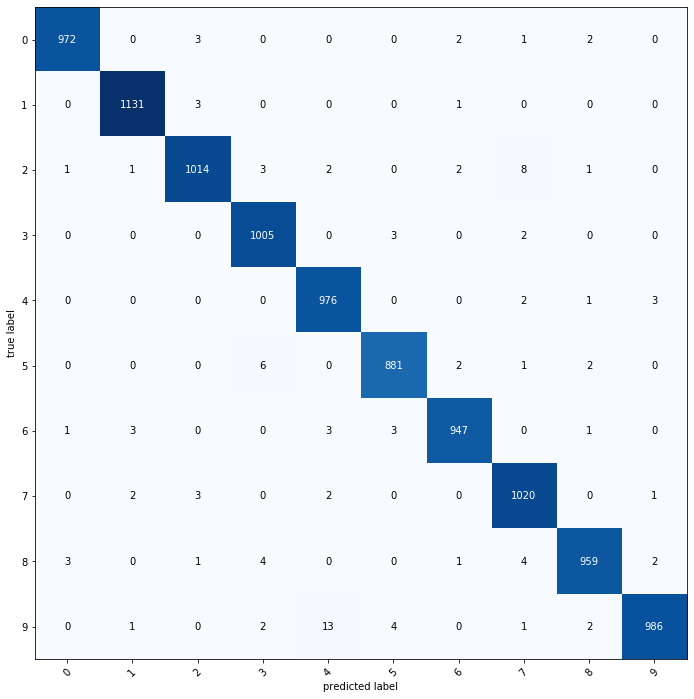

In [292]:
mat_5=confusion_matrix(y_test,preds_model_5)
plot_confusion_matrix(mat_5,figsize=(12,12),class_names=[0,1,2,3,4,5,6,7,8,9])

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dd0592650>)

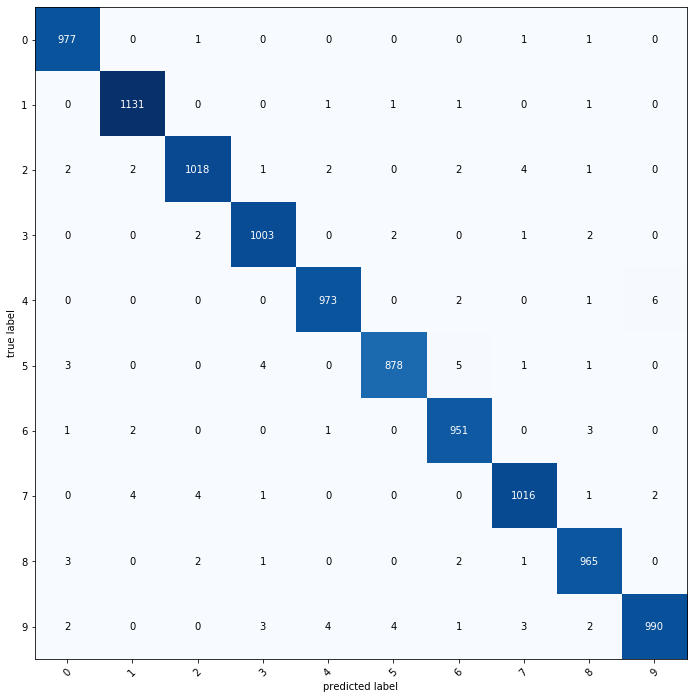

In [293]:
mat_3=confusion_matrix(y_test,preds_model_3)
plot_confusion_matrix(mat_3,figsize=(12,12),class_names=[0,1,2,3,4,5,6,7,8,9])

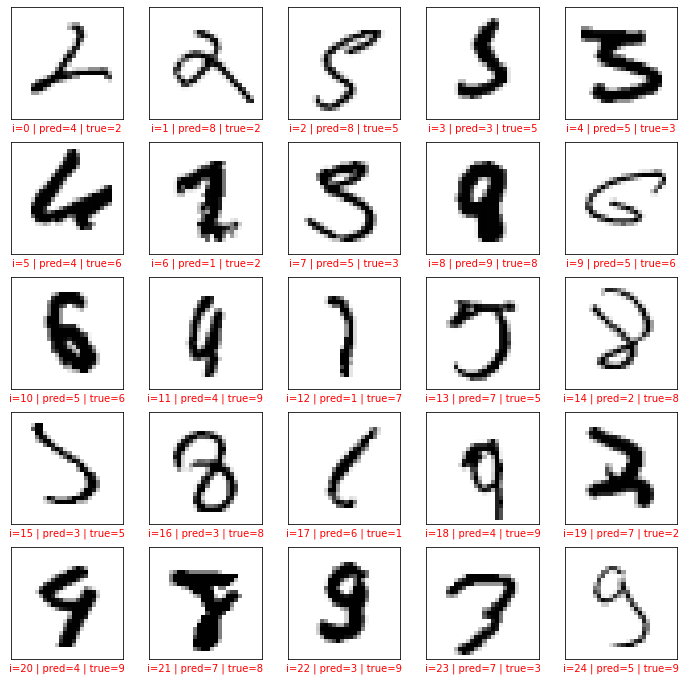

In [331]:
plt.figure(figsize = (12, 12))
start_index=0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, preds_model_5[diff_index_model_5[i]], y_test[diff_index_model_5[i]]), color = col)
    plt.imshow(x_test[diff_index_model_5[i]], cmap='binary')
plt.show()

In [303]:
diff_index_model_3[:40]

[321,
 340,
 619,
 646,
 659,
 740,
 938,
 1039,
 1112,
 1224,
 1226,
 1232,
 1242,
 1260,
 1299,
 1319,
 1364,
 1527,
 1641,
 1709,
 1717,
 1754,
 1878,
 1901,
 2035,
 2040,
 2070,
 2098,
 2130,
 2135,
 2185,
 2293,
 2447,
 2454,
 2462,
 2488,
 2582,
 2597,
 2654,
 2896]

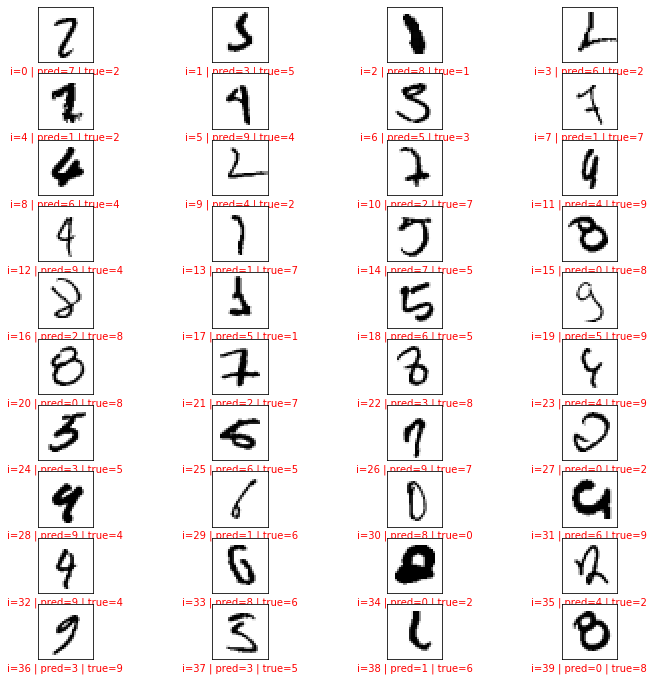

In [300]:
plt.figure(figsize = (12, 12))
start_index=0
for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, preds_model_3[diff_index_model_3[i]], y_test[diff_index_model_3[i]]), color = col)
    plt.imshow(x_test[diff_index_model_3[i]], cmap='binary')
plt.show()

In [ ]:
#augmentation would work better for more complicated pattern